# UC San Diego: Data Science in Practice
## Analyzing life expectancy in San Diego and its influential factors 

# Names

- Kyla Leilani Ortega
- Joshua Clarke
- Sheily Castellanos
- Maxine Krantz
- Shruti Rao

# Overview

Using data from Live Well San Diego, our group wanted to explore how walkability variables such as public transportation, average commute time, and proximity to community spaces related to life expectancy. Using pair plot, heat maps, and decision trees, we were able to see some correlations between life expectancy and average commute time and use of public transportation. To explore this further, we used OLS multivariate linear regression and found that the best predictor for life expectancy in our dataset was the proxmity to community spaces (parks and recreational facilities).


<a id='research_question'></a>
# Research Question

* How do variables such as public transportation, average commute time, and community spaces + enviornment accross cities in San Diego over time relate to people's life expectancy?


<a id='background'></a>

## Background & Prior Work

The main motivation behind our research topic was to explore aspects of walkability and transportation in San Diego and how it might relate to longevity. Through our research, we know that physical inactivity is a major public health issue and being in car-dependent areas takes away opportunites for walking and cycling to work, leisure, and other activities. More and more research is being done on how the environement also plays a role in this public health issue, as in how cities are planned to promote healthy transportation and lifestyles. 

1) Leslie E, Coffee N, Frank L, Owen N, Bauman A, Hugo G. 2007. Walkability of local communities: using geographic information systems to objectively assess relevant environmental attributes. Health & Place. https://doi.org/10.1016/j.healthplace.2005.11.001.

- This study used geographic information systems in Australia to look at mulitple factors of walkability including levels of density, mixed use, and connectivity across a city. They define the concept of walkability as "the extent to which characteristics of the built environment and land use may or may not be conducive to residents in the area walking for either leisure, exercise or recreation, to access services, or to travel to work." The measures in the study were taken to examine the opportunities for physical activity. They argue that environments have the potential to influence physical activity, especially in regard to community desgin principals. For example, efforts for more city connectivity should be taken for places that are compact with mixed uses, but dependent on car usage.

2) Sallis JF, Lawrence FD, Saelens BE, Kraft MK. 2004. Transport Res Pol Pract 38(4):249-268. Active transportation and physical activity: Opportunities for collaboration on transportation and public health research. https://doi.org/10.1016/j.tra.2003.11.003

- This study addresses the public health issue of physically inactive lifestyles by questioning how transportation and planning can be more collaborative with public health goals. This study also takes into account the dangers of traffic-related pedestrian/cyclist deaths and air pollution, though it argues that the consequences of physical inactivity are a far greater health problem. They also find that land use in an urban development that has the greatest link with public health. The current approaches of zoning that segregate uses and increase trip distances between destinations increase air pollution and reduce walking and cycling in the population. Another potential benefit is that the same planning that is associated with non-motorized transport is public transit, which has been consistent with high walking levels. The study mentions Atlanta and Seattle as regions that have made great strides for transportation and health researchers that have cultivated environments that promote physical activity.

3) Kotifani, A. “How Changing Your Work Commute Can Help You Live Longer.” Blue Zones, 26 Sept. 2022, www.bluezones.com/2018/05/
could-switching-up-your-commute-increase-longevity/. 

- This study explores the relationship between work commute and longevity, showing the different effects that having a shorter or longer travel time can have on your lifespan. Compared to other places that are centrally built around movement and walking places is fundamentally part of their everday lives, these researchers discovered how the opposite is true for people in the United States, that we've engineered movement out of our daily lives. Researchers found that active transportation users had a lower risk of cardiovascular disease, cancer, and all-cause mortality in follow-up years — whether by bike, on foot, public transportation, or a combination of the three; and Walkers showed a 24 percent lower risk of having a heart attack than non-active transportation users. What the authors noted from their study results is that active commuting is a possibility for a much wider range of people than those who live within a narrow circumference of where they work. If we can change cities so that it’s easier for people to be more active, then people will be.https://www.bluezones.com/2018/05/could-switching-up-your-commute-increase-longevity/ 

# Hypothesis


 Null Hypothesis: There will be no statisitical significance in the relationship between public transportation, average commute time, and community spaces + enviornment with a person's life expectancy.   


Alt Hypothesis: There will be a statistical significance in the relationship between  public transportation, average commute time, and community spaces + enviornment and a person's life expectancy because these are influential factors in one's wellbeing.   


# Dataset

- Dataset Name: Live Well San Diego Database
- Link to the dataset: https://data.sandiegocounty.gov/Live-Well-San-Diego/Live-Well-San-Diego-Database/fime-xc2s
- Number of observations: 31287

The dataset we have found for answering this question is the [Live Well San Diego database](https://data.sandiegocounty.gov/Live-Well-San-Diego/Live-Well-San-Diego-Database/fime-xc2s), which starts in 2009 and is collected annually. It includes many variables from all of San Diego County's cities pertaining to well-being, such as health, knowledge, standard of living, community, and social influences. It has 962 rows and 61 columns total.


# Data Wrangling

First, we imported pandas in order to read in the csv file from the Live Well San Diego Database.

In [2]:
#Import pandas and numpy for data frames and numeric data
import pandas as pd
import numpy as np

#Import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

#Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

#Import stats bc stats are fun!
import scipy.stats as stats
import patsy
import statsmodels.api as sm

In [3]:
#Read in data
original_df = pd.read_csv('https://data.sandiegocounty.gov/resource/fime-xc2s.csv?$query=SELECT%0A%20%20%60originalsort%60%2C%0A%20%20%60geography%60%2C%0A%20%20%60geotype%60%2C%0A%20%20%60newsort%60%2C%0A%20%20%60data_year%60%2C%0A%20%20%60hlth_life_expectancy%60%2C%0A%20%20%60hlth_quality_life%60%2C%0A%20%20%60hlth_quality_life_2%60%2C%0A%20%20%60hlth_smoking%60%2C%0A%20%20%60hlth_exercise%60%2C%0A%20%20%60edu_nohs%60%2C%0A%20%20%60edu_hs%60%2C%0A%20%20%60edu_bachelor%60%2C%0A%20%20%60edu_graduate%60%2C%0A%20%20%60edu_enrollment%60%2C%0A%20%20%60sol_unemployment_acs%60%2C%0A%20%20%60sol_housing_income%60%2C%0A%20%20%60sol_percapitaincome%60%2C%0A%20%20%60sol_medianhouseholdincome%60%2C%0A%20%20%60sol_checkingaccounts%60%2C%0A%20%20%60sol_savingsaccounts%60%2C%0A%20%20%60sol_retirementsavings%60%2C%0A%20%20%60com_injuries%60%2C%0A%20%20%60com_community_space%60%2C%0A%20%20%60com_community_space2%60%2C%0A%20%20%60com_rec_facilities%60%2C%0A%20%20%60com_rate_overallcrime%60%2C%0A%20%20%60com_rate_violentcrime%60%2C%0A%20%20%60com_rate_propertycrime%60%2C%0A%20%20%60com_airquality%60%2C%0A%20%20%60com_ozone%60%2C%0A%20%20%60com_particulate%60%2C%0A%20%20%60com_recycling%60%2C%0A%20%20%60soc_primarycaregiver%60%2C%0A%20%20%60soc_selfcare%60%2C%0A%20%20%60soc_linguisticisolation%60%2C%0A%20%20%60soc_pop_uninsured_acs%60%2C%0A%20%20%60soc_foodinsecurity%60%2C%0A%20%20%60soc_computeraccess%60%2C%0A%20%20%60soc_internetaccess%60%2C%0A%20%20%60soc_volunteer%60%2C%0A%20%20%60soc_volunteercharity%60%2C%0A%20%20%60soc_contributepolitics%60%2C%0A%20%20%60soc_contributearts%60%2C%0A%20%20%60soc_contributeedu%60%2C%0A%20%20%60soc_contributeenviron%60%2C%0A%20%20%60soc_contributehlth%60%2C%0A%20%20%60soc_contributereligion%60%2C%0A%20%20%60soc_contributesocial%60%2C%0A%20%20%60soc_popcontributecharity%60%2C%0A%20%20%60soc_votepresidential%60%2C%0A%20%20%60soc_vote%60%2C%0A%20%20%60soc_publictransport%60%2C%0A%20%20%60soc_travel60minplus%60%2C%0A%20%20%60soc_avgtraveltime%60%2C%0A%20%20%60soc_unemployment_esri%60%2C%0A%20%20%60soc_pop_uninsured%60%2C%0A%20%20%60com_beachdays%60%2C%0A%20%20%60com_waterquality%60%2C%0A%20%20%60com_safety%60%2C%0A%20%20%60hlth_doctor_visit_6plus%60')
original_df

,originalsort,geography,geotype,newsort,data_year,hlth_life_expectancy,hlth_quality_life,hlth_quality_life_2,hlth_smoking,hlth_exercise,...,soc_vote,soc_publictransport,soc_travel60minplus,soc_avgtraveltime,soc_unemployment_esri,soc_pop_uninsured,com_beachdays,com_waterquality,com_safety,hlth_doctor_visit_6plus
0,1,Central Region,Region,1,2009,80.7,NaN,NaN,NaN,NaN,...,NaN,0.062,0.057,23.9,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Central San Diego,SRA,2,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.069,0.045,21.1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mid-City,SRA,3,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.063,0.055,24.2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Southeastern San Diego,SRA,4,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.051,0.075,27.2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,East Region,Region,5,2009,79.7,NaN,NaN,NaN,NaN,...,NaN,0.027,0.060,25.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,958,City of San Marcos,Municipal,70,2021,NaN,NaN,NaN,0.117,0.574,...,0.430,NaN,NaN,NaN,0.048,NaN,NaN,NaN,NaN,NaN
958,959,City of Santee,Municipal,71,2021,NaN,NaN,NaN,0.131,0.565,...,0.482,NaN,NaN,NaN,0.071,NaN,NaN,NaN,NaN,NaN
959,960,City of Solana Beach,Municipal,72,2021,NaN,NaN,NaN,0.090,0.689,...,0.590,NaN,NaN,NaN,0.039,NaN,NaN,NaN,NaN,NaN
960,961,City of Vista,Municipal,73,2021,NaN,NaN,NaN,0.127,0.534,...,0.381,NaN,NaN,NaN,0.054,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

* Describe your data cleaning steps here.

In [4]:
#Dropping all columns except those required for research question and potential further exploration
df = original_df[['geography', 'geotype', 'hlth_life_expectancy', 'data_year', 'com_community_space', 'com_community_space2', 'com_rec_facilities','com_airquality', 'soc_publictransport', 'soc_avgtraveltime','soc_travel60minplus']].copy()
df

,geography,geotype,hlth_life_expectancy,data_year,com_community_space,com_community_space2,com_rec_facilities,com_airquality,soc_publictransport,soc_avgtraveltime,soc_travel60minplus
0,Central Region,Region,80.7,2009,NaN,NaN,NaN,NaN,0.062,23.9,0.057
1,Central San Diego,SRA,NaN,2009,NaN,NaN,NaN,NaN,0.069,21.1,0.045
2,Mid-City,SRA,NaN,2009,NaN,NaN,NaN,NaN,0.063,24.2,0.055
3,Southeastern San Diego,SRA,NaN,2009,NaN,NaN,NaN,NaN,0.051,27.2,0.075
4,East Region,Region,79.7,2009,NaN,NaN,NaN,NaN,0.027,25.8,0.060
...,...,...,...,...,...,...,...,...,...,...,...
957,City of San Marcos,Municipal,NaN,2021,0.514,0.471,NaN,NaN,NaN,NaN,NaN
958,City of Santee,Municipal,NaN,2021,0.543,0.530,NaN,NaN,NaN,NaN,NaN
959,City of Solana Beach,Municipal,NaN,2021,0.749,0.472,NaN,NaN,NaN,NaN,NaN
960,City of Vista,Municipal,NaN,2021,0.598,0.564,NaN,NaN,NaN,NaN,NaN


We're ultimately going to be comparing the different areas in SD, so we should probably get a sense of how many different neighborhoods are represented in our dataset, by running the code below:

In [5]:
# determine how many different nationalities
df['geography'].unique()

array(['Central Region', 'Central San Diego', 'Mid-City',
       'Southeastern San Diego', 'East Region', 'Alpine', 'El Cajon',
       'Harbison Crest', 'Jamul', 'La Mesa', 'Laguna-Pine Valley',
       'Lakeside', 'Lemon Grove', 'Mountain Empire', 'Santee',
       'Spring Valley', 'North Central Region', 'Coastal',
       'Del Mar-Mira Mesa', 'Elliott-Navajo', 'Kearny Mesa', 'Miramar',
       'Peninsula', 'University', 'North Coastal Region', 'Carlsbad',
       'Oceanside', 'Pendleton', 'San Dieguito', 'Vista',
       'North Inland Region', 'Anza-Borrego Springs', 'Escondido',
       'Fallbrook', 'North San Diego', 'Palomar-Julian', 'Pauma', 'Poway',
       'Ramona', 'San Marcos', 'Valley Center', 'South Region',
       'Chula Vista', 'Coronado', 'National City', 'South Bay',
       'Sweetwater', 'San Diego County', 'California', 'United States',
       'Supervisorial District 1', 'Supervisorial District 2',
       'Supervisorial District 3', 'Supervisorial District 4',
       'Supervi

In [6]:
# lets check out the na value counts for each column
df.isna().sum()

geography                 0
geotype                  39
hlth_life_expectancy    461
data_year                 0
com_community_space     602
com_community_space2    602
com_rec_facilities      926
com_airquality          926
soc_publictransport      88
soc_avgtraveltime        86
soc_travel60minplus      86
dtype: int64

Out of the 962 rows, com_rec_facilities and com_airquality was missing 926. Meaning, we only have 36 data entries for each variable out of 962! Let's drop them using the code below:

In [7]:
# Dropping columns with too little data for analysis, 'com_rec_facilities' and 'com_airquality' both only have 36 rows with data present
df.drop(['com_rec_facilities', 'com_airquality'], axis=1, inplace=True)
 
df.isna().sum()  

geography                 0
geotype                  39
hlth_life_expectancy    461
data_year                 0
com_community_space     602
com_community_space2    602
soc_publictransport      88
soc_avgtraveltime        86
soc_travel60minplus      86
dtype: int64

In [8]:
print(df[df['geotype'].isna()])

# Here we can see that there are repeated rows for 'San Diego County', 'California', and 'United States' that cause us to have NaN values in 'geotype' column
df = df[~df['geography'].isin(['San Diego County', 'California', 'United States'])]

#Dropping all values for 'San Diego County', 'California', and 'United States' as these are not specific cities in San Diego
df.isna().sum()

            geography geotype  hlth_life_expectancy  data_year  \
47   San Diego County     NaN                  81.5       2009   
48         California     NaN                   NaN       2009   
49      United States     NaN                  78.5       2009   
121  San Diego County     NaN                  81.7       2010   
122        California     NaN                   NaN       2010   
123     United States     NaN                  78.7       2010   
195  San Diego County     NaN                  82.0       2011   
196        California     NaN                   NaN       2011   
197     United States     NaN                  78.7       2011   
269  San Diego County     NaN                  81.9       2012   
270        California     NaN                   NaN       2012   
271     United States     NaN                  78.8       2012   
343  San Diego County     NaN                  82.3       2013   
344        California     NaN                   NaN       2013   
345     Un

geography                 0
geotype                   0
hlth_life_expectancy    449
data_year                 0
com_community_space     568
com_community_space2    568
soc_publictransport      85
soc_avgtraveltime        83
soc_travel60minplus      83
dtype: int64

In [9]:
print(df[df['soc_publictransport'].isna()])
print(df[df['soc_avgtraveltime'].isna()])
print(df[df['soc_travel60minplus'].isna()])
#these look to be about the same rows with NaN in values in columns: 'soc_publictransport','soc_avgtraveltime', and 'soc_travel60minplus'
#also they mostly seem to be 'geotype' 'Municipal', this might be worth looking into but for simplicity we will drop them
df = df.dropna(subset=['soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus'])
df.isna().sum()

                geography    geotype  hlth_life_expectancy  data_year  \
73   Unincorporated Areas  Municipal                   NaN       2009   
147  Unincorporated Areas  Municipal                   NaN       2010   
221  Unincorporated Areas  Municipal                   NaN       2011   
295  Unincorporated Areas  Municipal                   NaN       2012   
369  Unincorporated Areas  Municipal                   NaN       2013   
..                    ...        ...                   ...        ...   
957    City of San Marcos  Municipal                   NaN       2021   
958        City of Santee  Municipal                   NaN       2021   
959  City of Solana Beach  Municipal                   NaN       2021   
960         City of Vista  Municipal                   NaN       2021   
961  Unincorporated Areas  Municipal                   NaN       2021   

     com_community_space  com_community_space2  soc_publictransport  \
73                   NaN                   NaN      

geography                 0
geotype                   0
hlth_life_expectancy    402
data_year                 0
com_community_space     560
com_community_space2    560
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
dtype: int64

In [10]:
df_pre_2017 = df[df['data_year'] < 2017].copy()
df_pre_2017.drop(['com_community_space', 'com_community_space2'], axis=1, inplace=True)

df_post_2017 = df[df['data_year'] >= 2017].copy()
#community space started being recorded in 2017, so we have split the dataset into two separate ones:
#df_pre_2017 and df_post_2017(>= 2017)

df.drop(['com_community_space', 'com_community_space2'], axis=1, inplace=True)

df_pre_2017.isna().sum()

geography                 0
geotype                   0
hlth_life_expectancy    281
data_year                 0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
dtype: int64

In [11]:
df_post_2017.isna().sum()

geography                 0
geotype                   0
hlth_life_expectancy    121
data_year                 0
com_community_space       0
com_community_space2      0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
dtype: int64

In [12]:
df.isna().sum()

geography                 0
geotype                   0
hlth_life_expectancy    402
data_year                 0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
dtype: int64

# Data Visualization

#### Summary Statistics for Each Dataset and Univariate Analysis

In [35]:
print('Dataframe Pre-2017')
df_pre_2017.describe()

Dataframe Pre-2017


,hlth_life_expectancy,data_year,soc_publictransport,soc_avgtraveltime,soc_travel60minplus
count,279.000000,560.000000,560.000000,560.000000,560.000000
mean,82.396057,2012.500000,0.027189,25.505714,0.075302
std,2.765009,2.293336,0.020471,4.792515,0.057106
min,73.400000,2009.000000,0.000000,8.300000,0.001000
25%,80.500000,2010.750000,0.012000,23.300000,0.045000
50%,82.000000,2012.500000,0.022000,25.500000,0.061000
75%,84.150000,2014.250000,0.039000,27.200000,0.084000
max,93.500000,2016.000000,0.092000,42.600000,0.401000


In [34]:
print('\nDataframe Post-2017')
df_post_2017.describe()


Dataframe Post-2017


,hlth_life_expectancy,data_year,com_community_space,com_community_space2,soc_publictransport,soc_avgtraveltime,soc_travel60minplus
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,82.459615,2018.500000,0.579923,0.505122,0.026545,26.946154,0.078545
std,3.272757,1.121635,0.196423,0.175714,0.021213,3.589274,0.036469
min,74.000000,2017.000000,0.068000,0.046000,0.001000,20.000000,0.026000
25%,80.200000,2017.750000,0.473000,0.434000,0.011000,24.975000,0.054750
50%,82.650000,2018.500000,0.590000,0.526500,0.018000,27.200000,0.077000
75%,84.725000,2019.250000,0.745000,0.630000,0.039250,28.300000,0.093000
max,89.500000,2020.000000,0.916000,0.775000,0.100000,38.100000,0.238000


Text(0, 0.5, 'Instances')

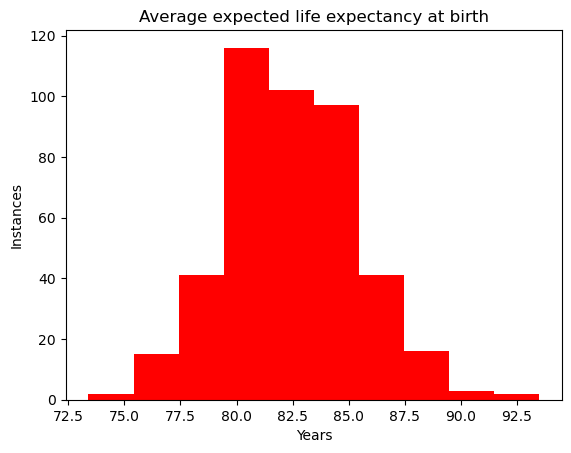

In [14]:
plt.hist(x = 'hlth_life_expectancy', data = df, color= 'red')
plt.title("Average expected life expectancy at birth")
plt.xlabel('Years')
plt.ylabel('Instances')

Another interesting histogram displays that the average expected life expectancy at birth appears to be a roughly normal bell curve.

Text(0, 0.5, 'Instances')

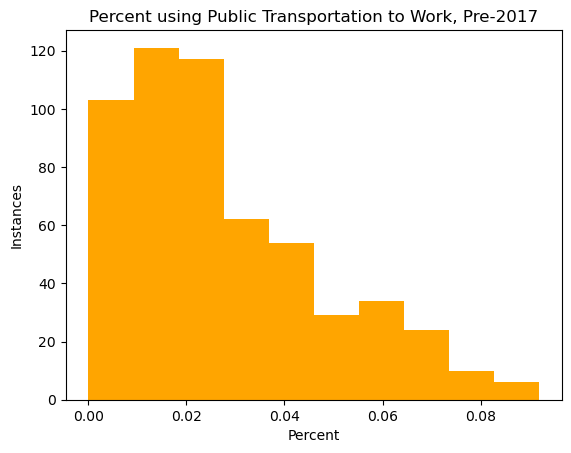

In [16]:
plt.hist(x = 'soc_publictransport', data = df_pre_2017, color= 'orange')
plt.title("Percent using Public Transportation to Work, Pre-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

An interesting thing to note during this univariate analysis is that a shockingly low percentage of populations take public transportation to work.

Text(0, 0.5, 'Instances')

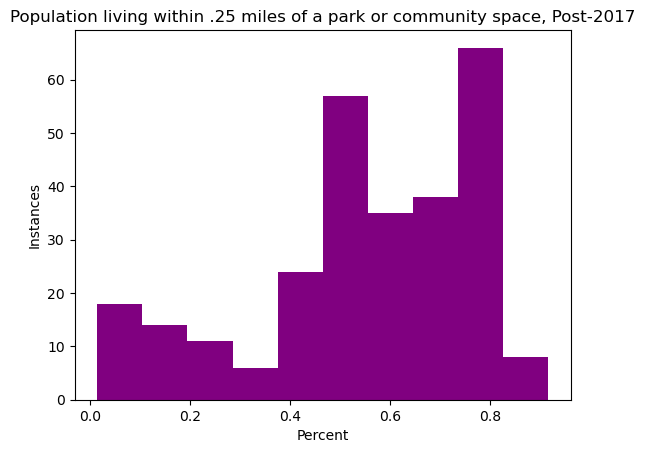

In [18]:
plt.hist(x = 'com_community_space', data = df_post_2017, color = 'purple')
plt.title("Population living within .25 miles of a park or community space, Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Since the post-2017 dataframe includes the community spaces, it is interesting to see the variation among the communities with people who live a walkable distance from a park or community space. 

Text(0, 0.5, 'Instances')

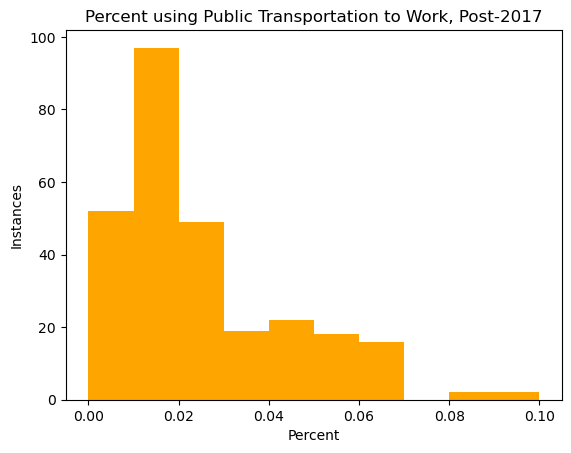

In [19]:
plt.hist(x = 'soc_publictransport', data = df_post_2017, color= 'orange')
plt.title("Percent using Public Transportation to Work, Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Post-2017, still a very low percentage of populations take public transportation to work.

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

#### Multivariate Analysis

Using pairplot, from seaborn, plot df for the columns	soc_publictransport	soc_avgtraveltime hlth_life_expectancy. Assign it to a variable called fig.

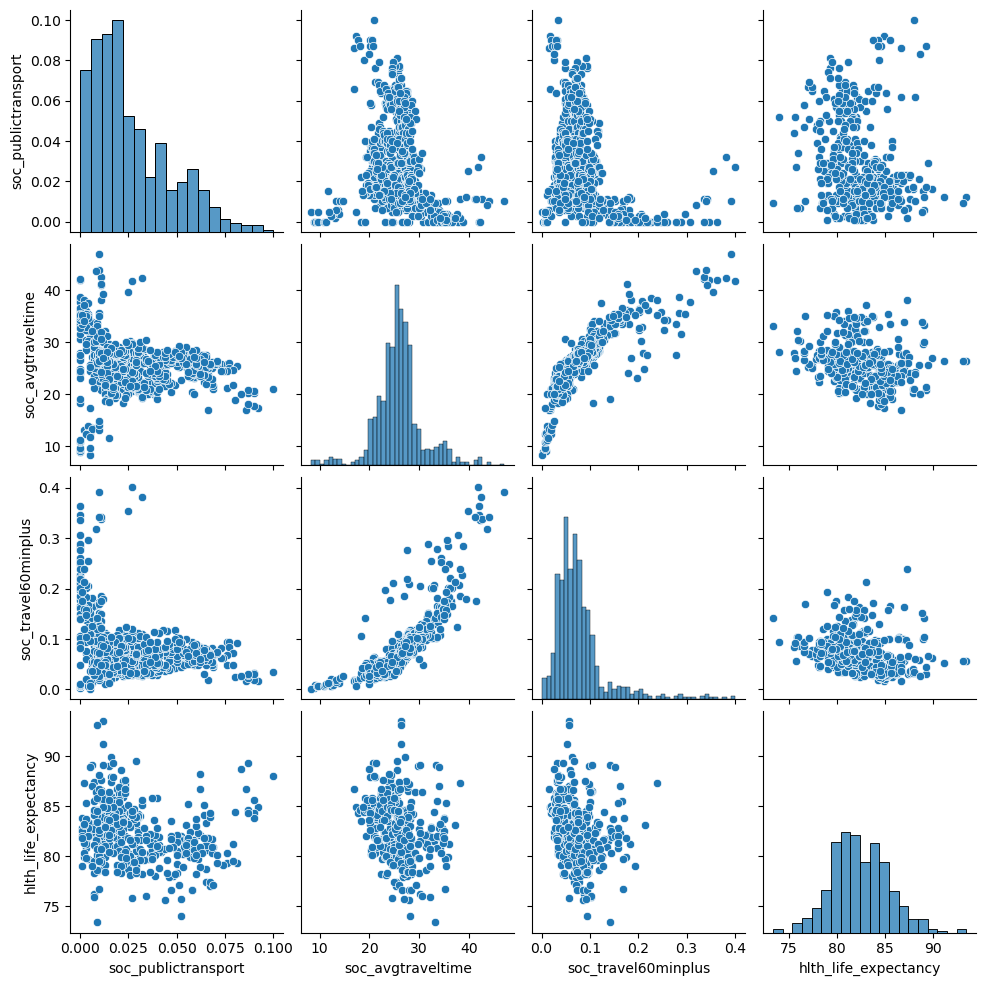

In [20]:
fig = sns.pairplot(df[['soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus', 'hlth_life_expectancy']])

C:\Users\kleil\AppData\Local\Temp\ipykernel_12344\3031227369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2f')


<Axes: >

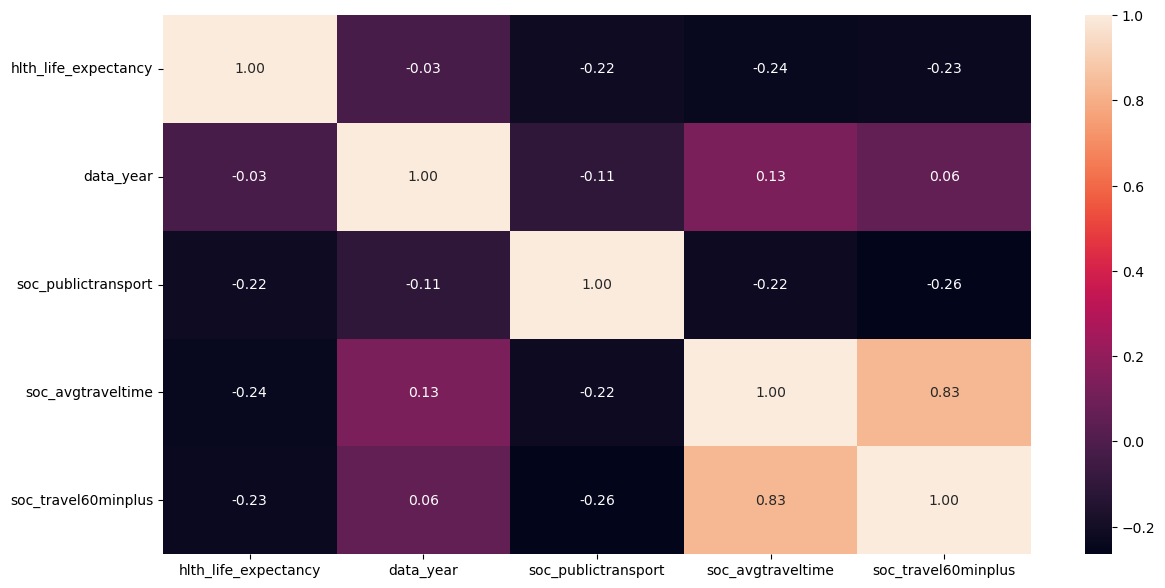

In [21]:
plt.figure(figsize = (14, 7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

There is nothing all that substantial to note here other than the low negative correlation between life expectancy and average travel time and the low negative correlation between life expectancy and public transportation use

Doing essentially what we did above but for the Post 2017 df which includes the community space variables

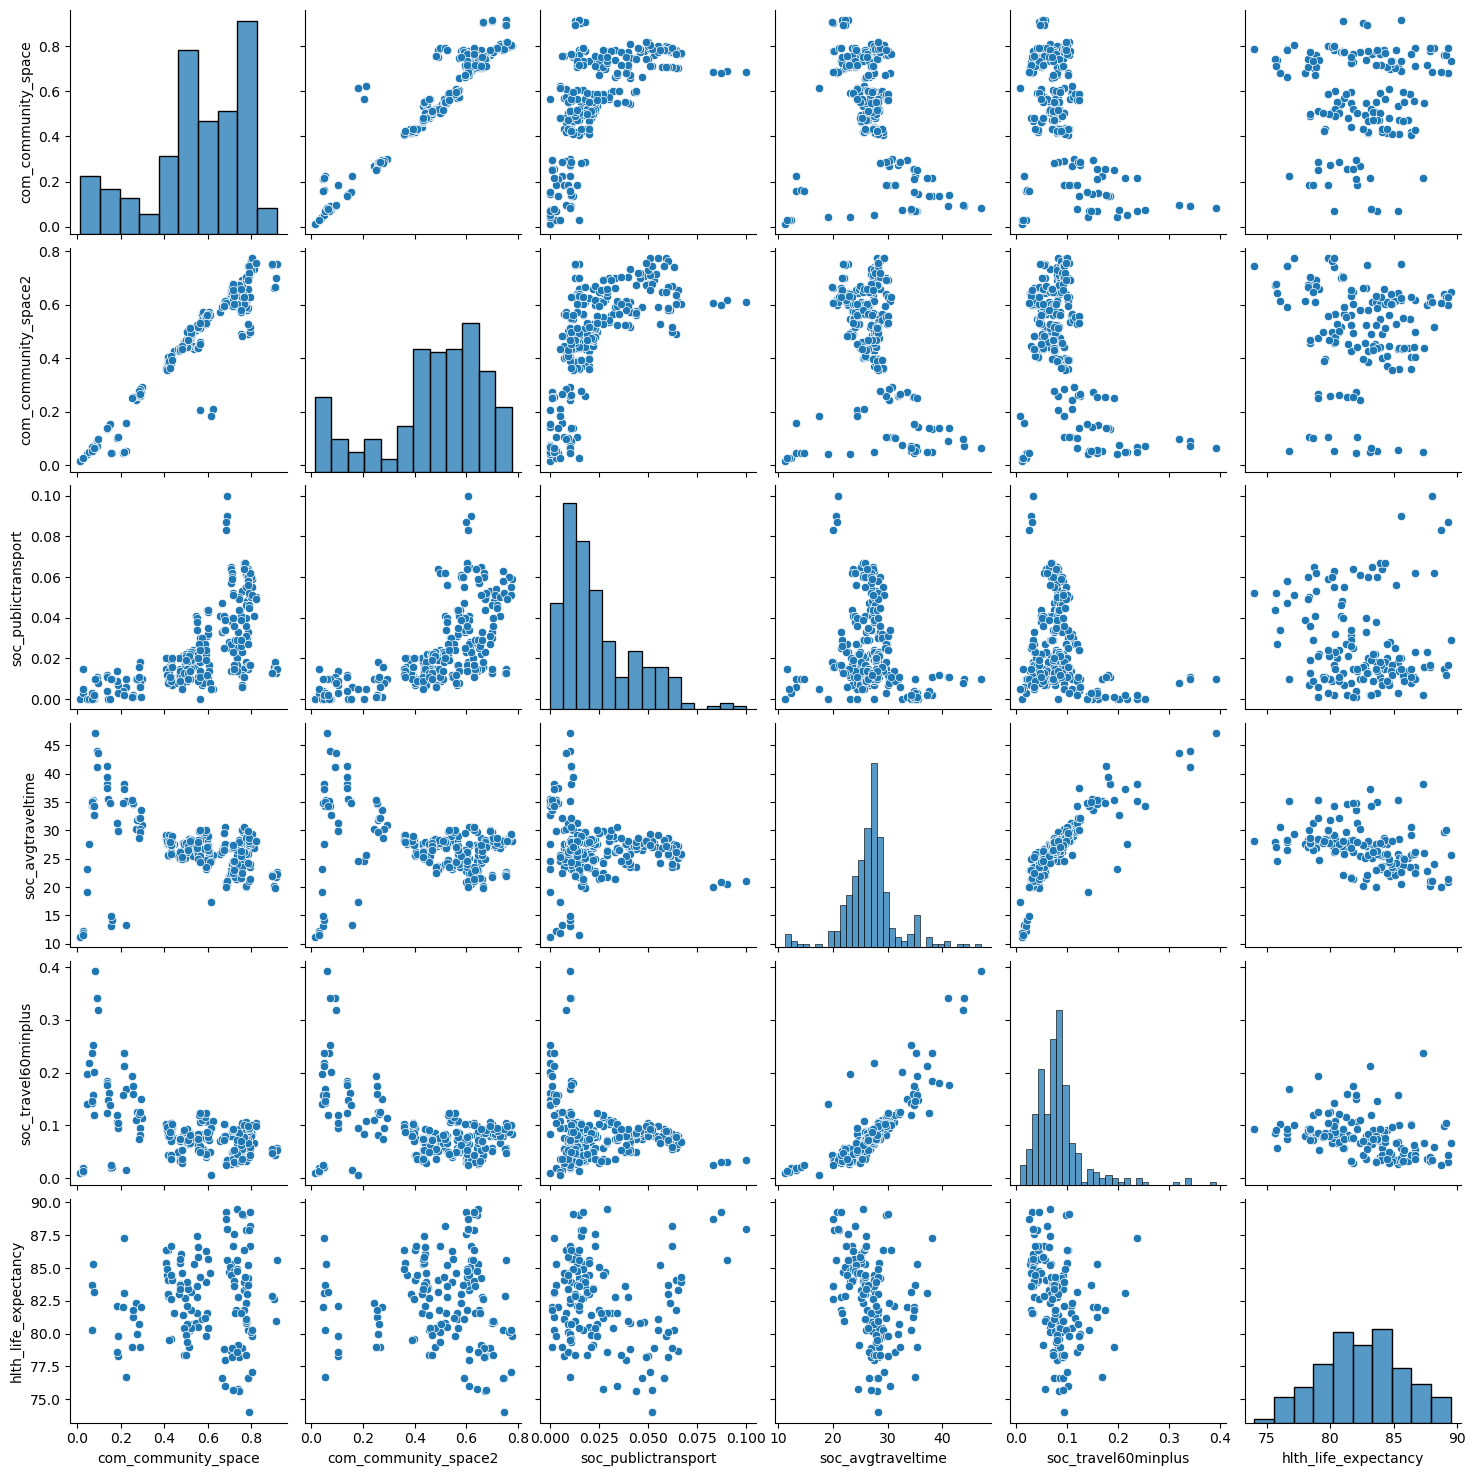

In [22]:
fig = sns.pairplot(df_post_2017[['com_community_space', 'com_community_space2', 'soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus', 'hlth_life_expectancy']])

C:\Users\kleil\AppData\Local\Temp\ipykernel_12344\4030580210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_post_2017.corr(), annot = True, fmt = '.2f')


<Axes: >

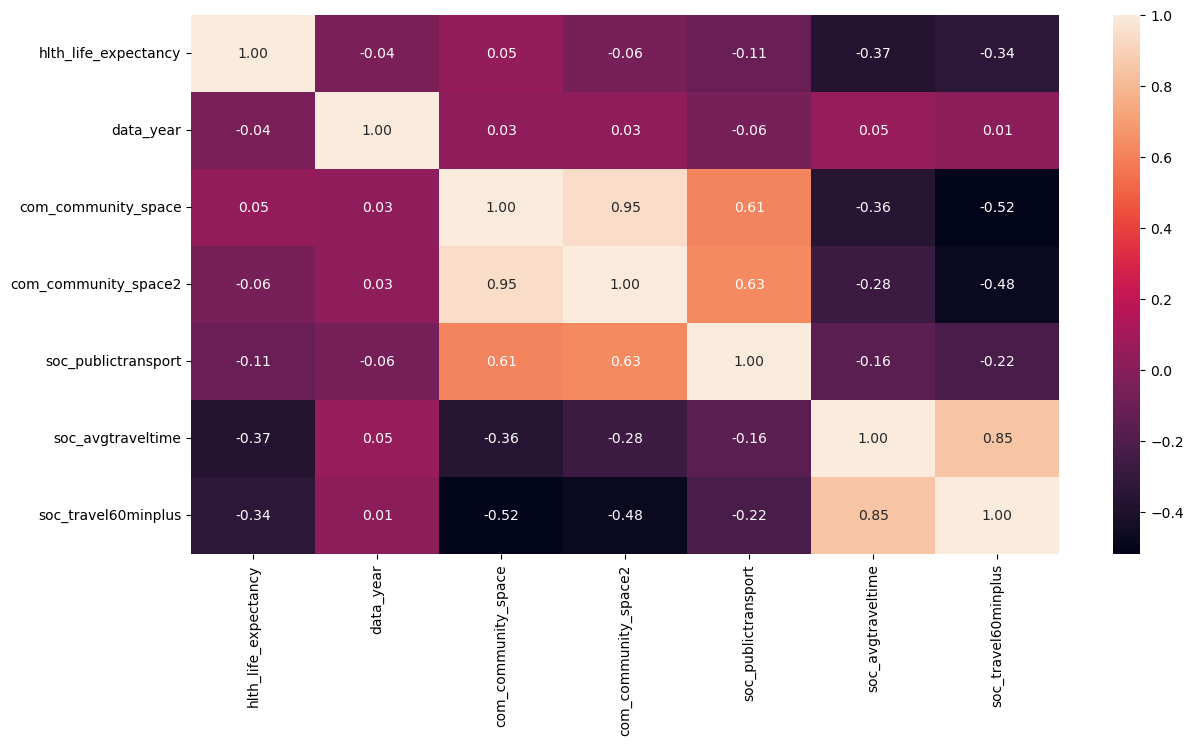

In [23]:
plt.figure(figsize = (14, 7))
sns.heatmap(df_post_2017.corr(), annot = True, fmt = '.2f')

Here we see an interestingly high correlation between community space and public transportation use. We also see higher negative correlations for the variables mentioned previously (life expectancy and public transportation use) which seems to further cement a relationship between them.

### Data Preparation for Model Building

In [24]:
df_post_2017 = df_post_2017.dropna(subset=['hlth_life_expectancy'])
# Separating the target variable and other variables
X = df_post_2017.drop(columns = 'hlth_life_expectancy')
Y = df_post_2017['hlth_life_expectancy']

# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### Decision Tree

In [25]:
d_tree = DecisionTreeRegressor(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Train MSE: 0.00
Test MSE: 7.57


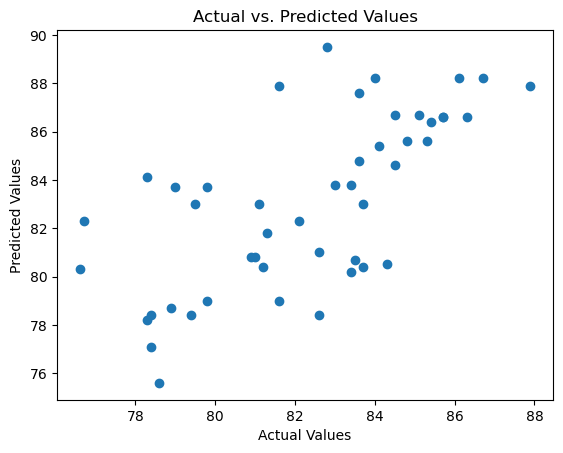

In [26]:
# Make predictions on the train set
y_train_pred = d_tree.predict(X_train)

# Calculate MSE on train set
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.2f}")

# Make predictions on the test set
y_test_pred = d_tree.predict(X_test)

# Calculate MSE on test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

# Plotting the predicted values against actual values for the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

We can see here that our model is overfitting as the Test MSE is much higher than the Train MSE. The model perfectly fits the training data but this is a common characteristic of decision trees as they have the ability to memorize the training data to an extent. This model will most likely not generalize well to new and unseen data.

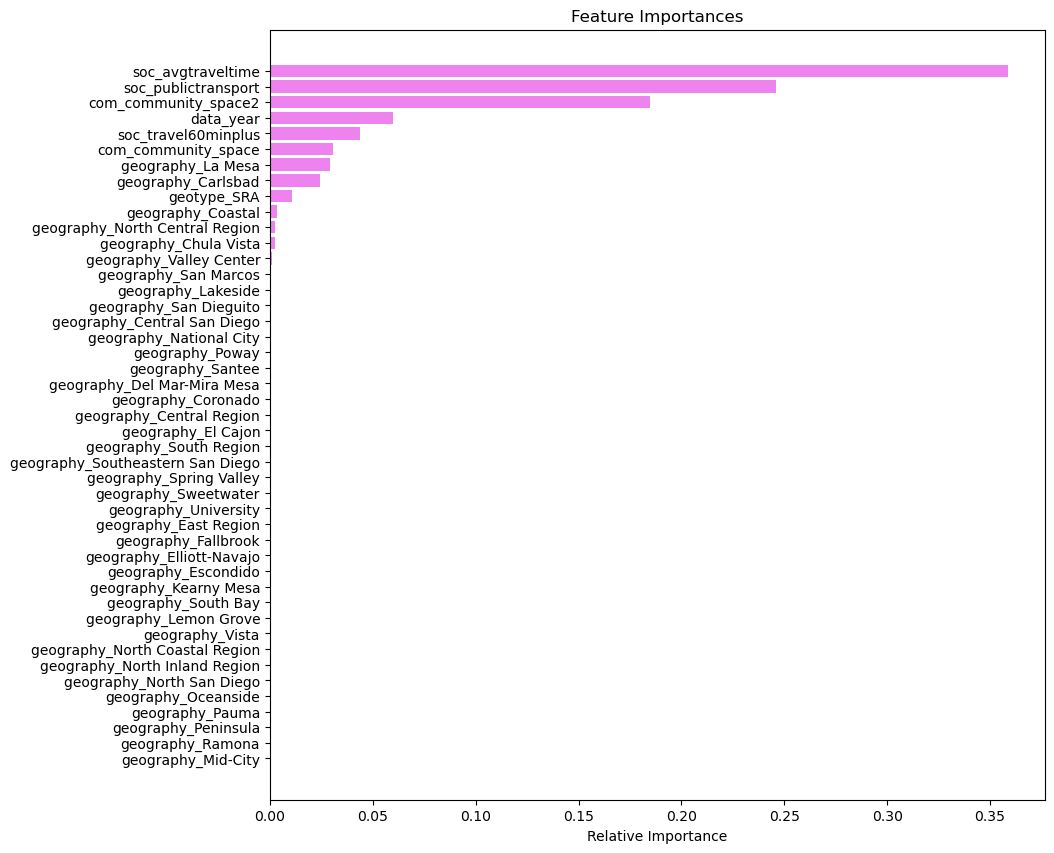

In [27]:
# Plotting the feature importance
features = X.columns.tolist()
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that our predictive model of life expectancy is pretty consistent with what we found in our earlier analysis as we see a higher relative importance of average travel time and public transport use as predictors of life expectancy 

### Linear Regression

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Train MSE: 2.29
Test MSE: 4.14


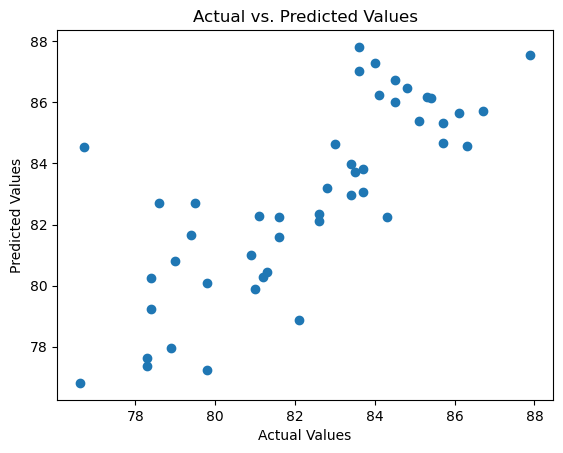

In [29]:
# Make predictions on the train set
y_train_pred = linreg.predict(X_train)

# Calculate MSE on train set
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.2f}")

# Make predictions on the test set
y_test_pred = linreg.predict(X_test)

# Calculate MSE on test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

# Plotting the predicted values against actual values for the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Both MSE values are relatively low, which would suggest that out linear regression model is performing reasonably well on both the training and test datasets, this model seems to be more balanced thus indicating better generalization ability.

data_year: 0.2145556098381177
com_community_space: 4.6266588761622485
com_community_space2: 11.611697347289416
soc_publictransport: 217.39089776587866
soc_avgtraveltime: -0.14041221622909494
soc_travel60minplus: 32.61965325188861
geography_Carlsbad: 1.5369341626082098
geography_Central Region: -8.344503468943428
geography_Central San Diego: -10.60851863358134
geography_Chula Vista: -21.853914067562926
geography_Coastal: -1.6807604443337656
geography_Coronado: -6.330117526038699
geography_Del Mar-Mira Mesa: 1.4210854715202004e-13
geography_East Region: -0.734045262249397
geography_El Cajon: -8.425020412538052
geography_Elliott-Navajo: -0.1418235859438258
geography_Escondido: -5.416088740252025
geography_Fallbrook: 0.17213882243493628
geography_Kearny Mesa: -7.909469371412691
geography_La Mesa: -8.434957077375023
geography_Lakeside: -0.441242571880659
geography_Lemon Grove: -15.374391634470946
geography_Mid-City: -15.231265475546854
geography_National City: -20.40105172061706
geography_N

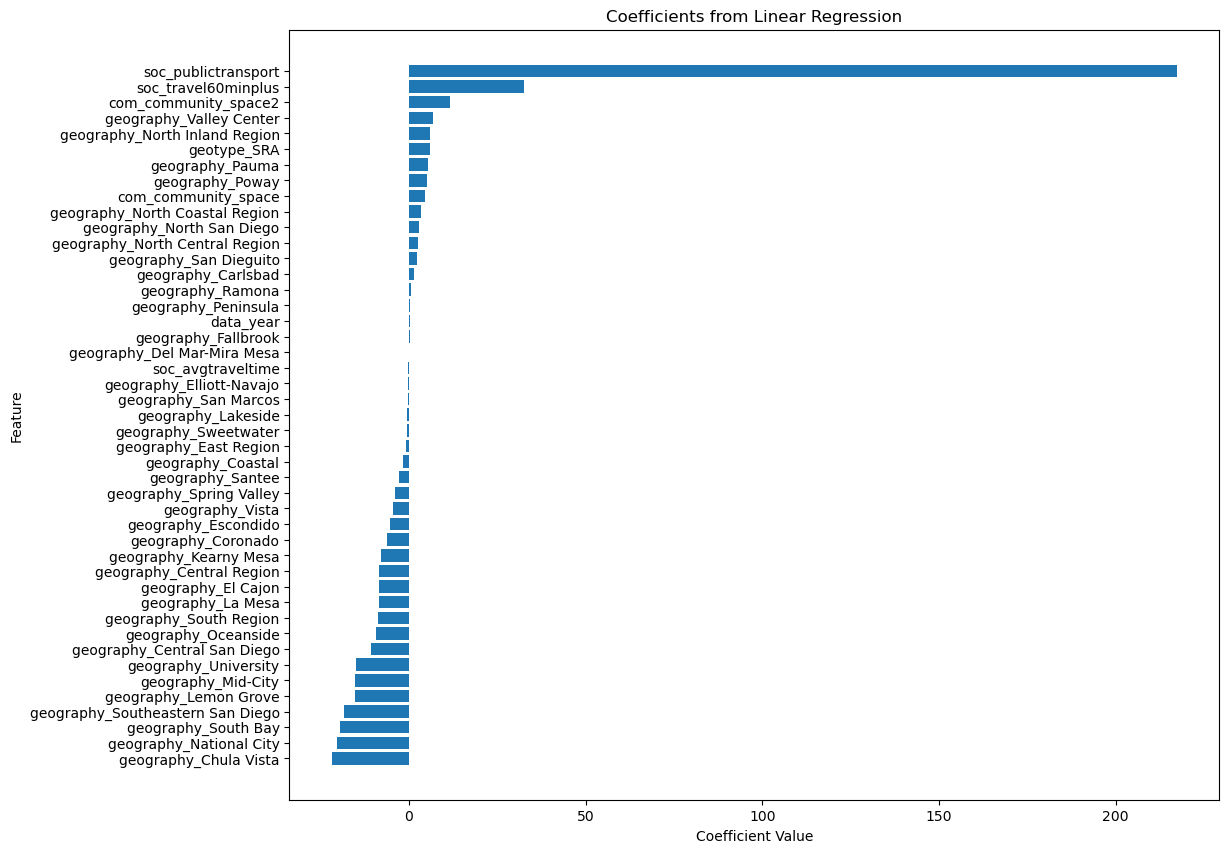

In [30]:
coef = linreg.coef_
features = X.columns.tolist()

for i in range(len(features)):
    print(f'{features[i]}: {coef[i]}')

coef_sorted, features_sorted = zip(*sorted(zip(coef, features), reverse=True))

plt.figure(figsize=(12, 10))
plt.barh(features_sorted, coef_sorted)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

Here we can see that soc_publictransport is high and positive indicating that an increase in public transportation use tends to increase the probability of higher life expectancies. We can see a similar relationship average travel time to work (above 60 minutes) and access to community space also increasing the probability of higher life expectancies in a population. We can also note that living in Chula Vista, National City, South Bay, and Southeastern San Diego tends to decrease the probability of high life expectancy. 

In [31]:
#OLS multivariate regression predicting life expectancy from commute times
outcome_1, predictors_1 = patsy.dmatrices(formula_like = "hlth_life_expectancy ~ soc_avgtraveltime + soc_travel60minplus + com_community_space + com_community_space2 + soc_publictransport",  data = df_post_2017)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                             OLS Regression Results                             
Dep. Variable:     hlth_life_expectancy   R-squared:                       0.346
Model:                              OLS   Adj. R-squared:                  0.324
Method:                   Least Squares   F-statistic:                     15.86
Date:                  Fri, 04 Aug 2023   Prob (F-statistic):           1.59e-12
Time:                          22:36:38   Log-Likelihood:                -372.71
No. Observations:                   156   AIC:                             757.4
Df Residuals:                       150   BIC:                             775.7
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

Judging by these OLS Regression Results, we can see that we can predict life expectancy by the Percent of Population living within .25 miles of a park or community space (com_community_space) based on an alpha value of .001. This could be because people that live closer to parks and community spaces tend to take more walks to those spaces, and thus get more exercise and possibly meaningful interactions with members of their community. These both have factors in extending longevity. Of course, there could be more variables not included in this regression.


# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).

Our study yielded a compelling finding: the percentage of the population living within .25 miles of a park or community space emerged as a reliable predictor of life expectancy. However, it is crucial to note that this factor alone is unlikely to be the sole cause of longer life expectancy. For instance, the wealth of the population, a significant influence not captured in our dataset, may play a crucial role. It is conceivable that wealthier areas enjoy additional benefits, including better access to parks and community spaces, contributing to higher life expectancies.

When examining other factors, we observed that an increase in public transportation use tends to increase the probability of higher life expectancies. Similarly, we found that average travel time to work (above 60 minutes) also shows a positive relationship, contributing to an increased probability of higher life expectancies in a population. We assume this is because people who take public transportation tend to walk more but without walkability data we cannot prove this. These additional factors may complement the effect of proximity to parks and community spaces in promoting healthier and longer lives for individuals. Hence, a multifaceted approach that considers various factors is necessary for a comprehensive understanding of life expectancy determinants.
* Discussed limitations of your analyses.

One big limitation of our analyses is that we do not have explicit walkability data. There is no dataset we could find that pertains to this, as it is more of an emerging field and the US is notable for its reliance on cars.As a result, we acknowledge that our study might not fully capture the potential influence of walkability on the variables under investigation. Future research in this area could benefit from more extensive data collection and advancements in the understanding of walkability's impact on our findings. 
* You can also discuss future directions you'd like to pursue.

One promising avenue is to continue seeking more appropriate and comprehensive measures of walkability. By incorporating advanced data sources and methodologies, we can enhance the accuracy and depth of our analysis. Another intriguing path for exploration is assessing whether walkability correlates with higher levels of community involvement. Understanding this potential connection could shed light on the broader impact of walkable environments on social engagement.By pursuing these future directions, we could deepen our understanding of the relationship between walkability and its implications on various aspects of community well-being.